<a href="https://colab.research.google.com/github/scorpion8567460/Test8567460/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# installing kaggle
!pip install kaggle

#**Importing the Dependencies**

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
# Loading the Dataset in to pandas Data Frame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [110]:
# Print first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
# Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [75]:
# Dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [76]:
# Checking the number of messing value in eache colume.
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [77]:
# Distribution of the ligit transection and fraudlent transection.
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


#**This Dataset is highly unblanced**

**0 ==> Indicate the Normal Transection**

**1 ==> Indicate the Fraud Transection**

In [79]:
# Seperating the data for Analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [80]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [81]:
# Statistical measure of the Data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [82]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [84]:
# Compare the values of both Transection
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#**Now Under the sampling**

A sample containing the simeral distribution of Normal and Fraud Transection.


Number of Fraudlant Transection ===> 492

In [85]:
legit_sample = legit.sample(n=492)

#Concatenating two DataFrames.

In [86]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [87]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178905,123837.0,0.265807,0.162190,1.360720,-0.382585,-0.154083,0.363256,0.204488,-0.013233,0.602107,...,0.205246,0.894489,0.095838,-0.379068,-0.976665,-0.491302,0.013858,-0.126121,47.38,0
140343,83670.0,1.331990,0.229553,-1.709419,-0.070049,2.556062,3.062893,-0.032812,0.647233,-0.400697,...,-0.050930,-0.243605,-0.180497,1.010036,1.009651,-0.280578,-0.006032,0.003995,1.79,0
199169,132836.0,-1.836685,0.184596,1.183483,-1.005062,-0.942679,0.095572,-0.806748,0.987779,0.351465,...,0.115058,0.109285,-0.347981,0.697101,0.076961,0.805787,-0.182272,-0.255660,91.51,0
108696,71026.0,1.212838,0.267328,0.315232,0.581823,-0.356691,-0.758519,-0.049484,-0.028570,-0.152310,...,-0.241639,-0.758466,0.122329,0.275696,0.169578,0.078753,-0.030157,0.019592,1.98,0
272004,164862.0,1.462499,-0.479409,-0.452083,3.602361,0.072227,1.242167,-0.359395,0.320921,-0.630368,...,0.326236,0.369576,-0.035018,0.050025,-0.310024,-0.038503,-0.046940,-0.002700,226.92,0


In [88]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [89]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [90]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98622.038618,0.067764,-0.049918,-0.019910,0.004436,-0.108972,0.067536,0.074472,0.034173,0.069633,...,-0.058184,0.005877,0.023097,0.054137,0.030648,0.003158,0.010266,-0.019422,0.022254,94.385894
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#Spliting the data Features and Targets

In [91]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [92]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
178905  123837.0  0.265807  0.162190  1.360720 -0.382585 -0.154083  0.363256   
140343   83670.0  1.331990  0.229553 -1.709419 -0.070049  2.556062  3.062893   
199169  132836.0 -1.836685  0.184596  1.183483 -1.005062 -0.942679  0.095572   
108696   71026.0  1.212838  0.267328  0.315232  0.581823 -0.356691 -0.758519   
272004  164862.0  1.462499 -0.479409 -0.452083  3.602361  0.072227  1.242167   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

Split data in Training data and Testing data

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [94]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


#Model of Training

Logistic Regression

In [95]:
model = LogisticRegression()

In [96]:
# Training tha logistic Regression with Training Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model.fit(x_train, y_train)

LogisticRegression()

#Model Evaluation

Accurecy Score

In [97]:
#Accurecy on Training Data
x_train_prediction = model.predict(x_train)
training_data_accurecy = accuracy_score(x_train_prediction, y_train)

In [98]:
print('Accurecy on Training Data : ', training_data_accurecy)

Accurecy on Training Data :  0.9593392630241423


In [99]:
# Accurecy on Test Data
x_test_prediction = model.predict(x_test)
test_data_accurecy = accuracy_score(x_test_prediction, y_test)

In [100]:
print('Accurecy on Test Data : ', test_data_accurecy)

Accurecy on Test Data :  0.9390862944162437


**Graphics View**

In [111]:
!pip install seaborn
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler

#Visualization



# 1. Class Distribution

<ipython-input-112-65e8ade2494e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_dataset, palette='viridis')


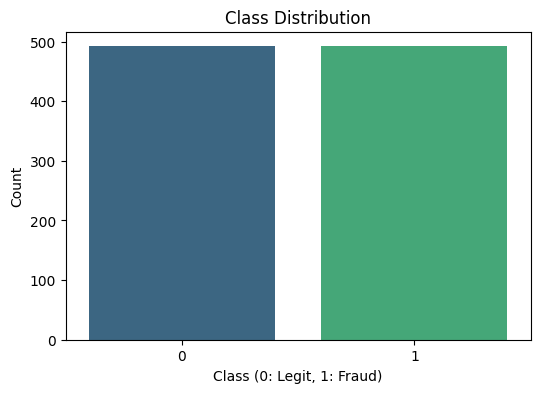

In [112]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_dataset, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class (0: Legit, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap

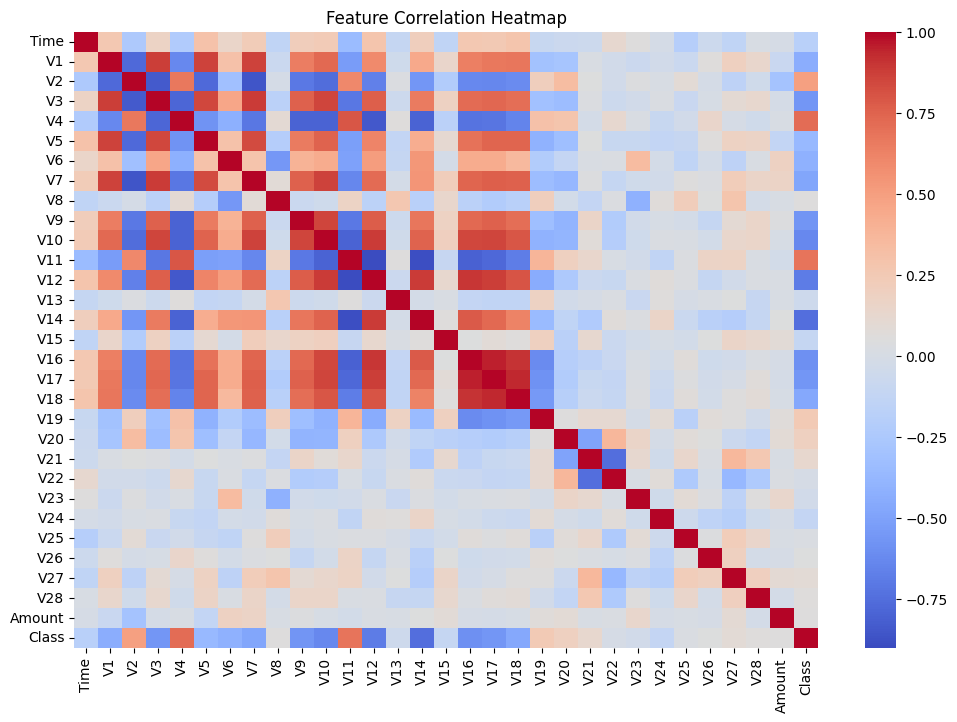

In [113]:
plt.figure(figsize=(12, 8))
sns.heatmap(new_dataset.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Transaction Amount Distribution

<ipython-input-104-65edaa2a90ba>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(legit['Amount'], label='Legit', shade=True, color='blue')
<ipython-input-104-65edaa2a90ba>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud['Amount'], label='Fraud', shade=True, color='red')


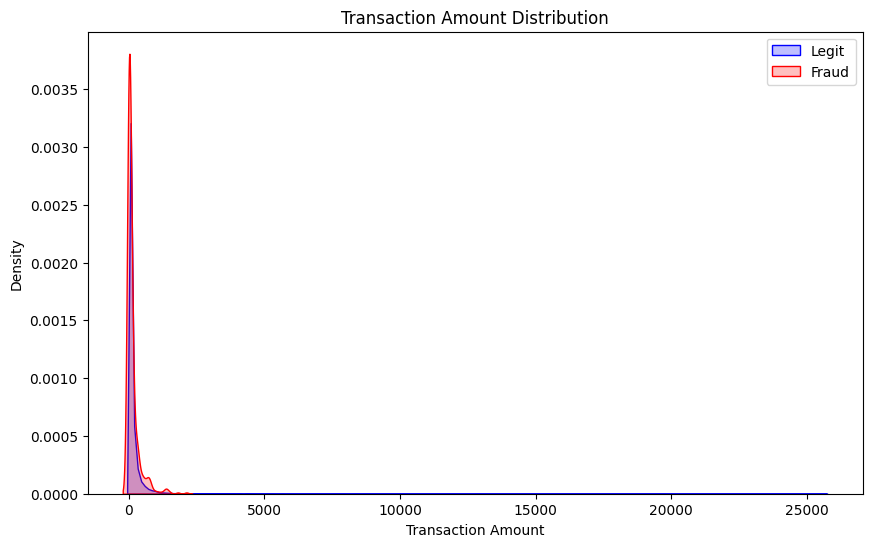

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(legit['Amount'], label='Legit', shade=True, color='blue')
sns.kdeplot(fraud['Amount'], label='Fraud', shade=True, color='red')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4. Confusion Matrix

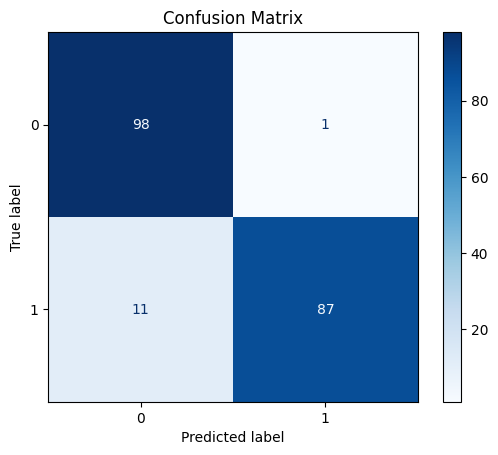

In [105]:
conf_matrix = confusion_matrix(y_test, x_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 5. Accuracy Bar Chart

<ipython-input-114-3d3ec167be11>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='plasma')


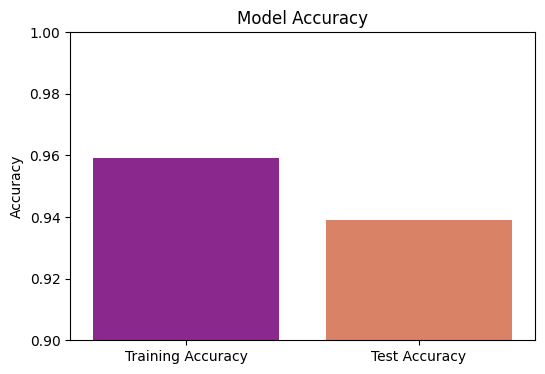

In [114]:
accuracies = [training_data_accuracy, test_data_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracies, palette='plasma')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

# 6. ROC Curve

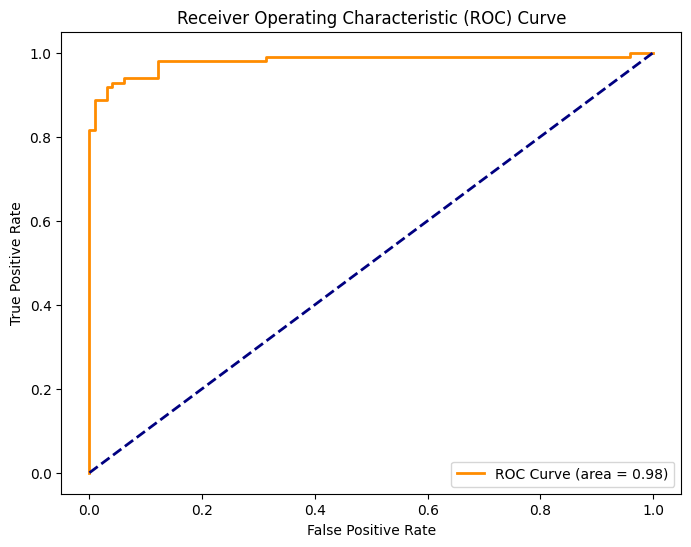

In [115]:
y_test_prob = model.predict_proba(x_test)[:, 1]  # Prediction probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Thank You